# Source2Token self attention

+ S2T 是一種多維ATTENTION，輸出結果為S，DIM:跟XI的一樣，可視為句子的Embedding

+ reference:
  + [R1](https://github.com/baaesh/DiSAN-pytorch/blob/master/module.py)
  + [init參數初始化使用](https://www.cnblogs.com/darkknightzh/p/8297793.html#_label0)
  + [參數初始化介紹](https://blog.csdn.net/VictoriaW/article/details/72872036)

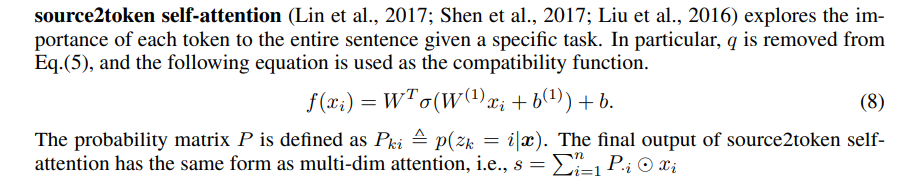

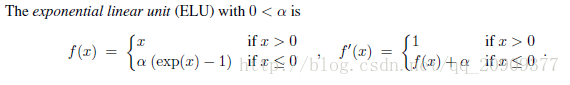

In [14]:
import torch
import torch.nn as nn
class Source2Token(nn.Module):
    def __init__(self,d_h,dropout=0.2):
        super(Source2Token,self).__init__()
        self.d_h = d_h
        self.dropout_rate = dropout
        self.fc1 = nn.Linear(d_h,d_h)
        self.fc2 = nn.Linear(d_h,d_h)
        
        # initialize the weight
        nn.init.xavier_uniform_(self.fc1.weight.data, gain=1.0)
        nn.init.xavier_uniform_(self.fc2.weight.data, gain=1.0)
        # initialize the bias to zero
        nn.init.constant_(self.fc1.bias.data,0)
        nn.init.constant_(self.fc2.bias.data,0)
        
        # Sigmoid
        self.elu = nn.ELU()
        # softmax row space dim:0
        self.softmax = nn.softmax(dim=-2)
        # 隨機丟一些數據，可以讓訓練更好
        self.dropout = nn.Dropout(dropout)
    def forward(self,x,req_mask):
        

tensor([[5., 8.],
        [5., 5.]], dtype=torch.float64)
tensor([[0.5000, 0.9526],
        [0.5000, 0.0474]], dtype=torch.float64)
tensor([[0.0474, 0.9526],
        [0.5000, 0.5000]], dtype=torch.float64)
